In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
# Load the dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [11]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28 , 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [13]:
model.fit(train_images , train_labels , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2974 - accuracy: 0.9136
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1430 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1058 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0874 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0754 - accuracy: 0.9757


In [14]:
test_loss , test_acc = model.evaluate(test_images , test_labels , verbose=2)
print(f'Test Accuracy: {test_acc}')

313/313 - 1s - loss: 0.0710 - accuracy: 0.9766 - 1s/epoch - 3ms/step
Test Accuracy: 0.9765999913215637


In [15]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


313/313 [==============================] - 1s 3ms/step


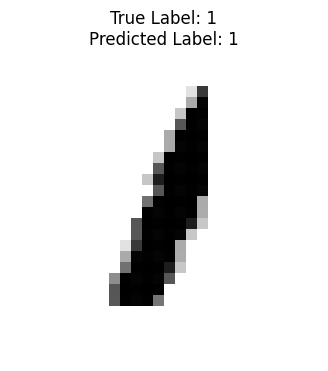

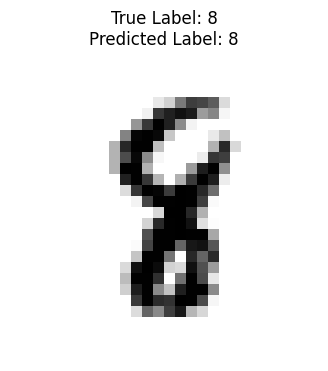

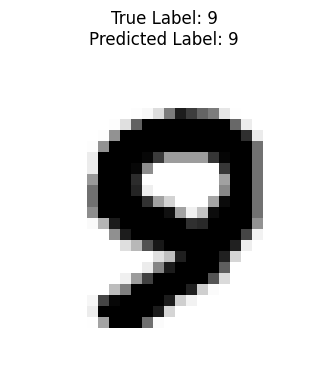

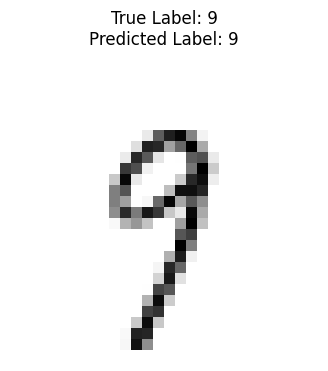

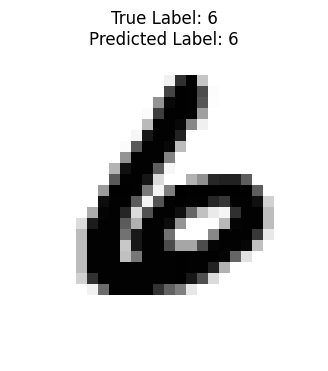

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions
predictions = model.predict(test_images)

# Function to display a random test image and its prediction
def plot_random_image(predictions, test_images, test_labels):
    i = np.random.randint(0, len(test_images))
    plt.figure(figsize=(4, 4))
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f"True Label: {test_labels[i]}\nPredicted Label: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()

# Display a few random images and their predictions
for _ in range(5):
    plot_random_image(predictions, test_images, test_labels)


In [20]:
from PIL import Image
import numpy as np

# Load your image
image = Image.open('G:\IMG_20221104_094215.JPG')  # Replace 'your_image.jpg' with your image file path

# Resize and convert to grayscale
image = image.resize((28, 28))
image = image.convert('L')

# Convert to NumPy array
image_array = np.array(image) / 255.0  # Normalize pixel values to be between 0 and 1

# Reshape the image to match the model's input shape
input_image = np.expand_dims(image_array, axis=0)


In [21]:
predictions = model.predict(input_image)


1/1 [==============================] - 0s 33ms/step


In [22]:
predicted_digit = np.argmax(predictions)
print(f"Predicted Digit: {predicted_digit}")


Predicted Digit: 3


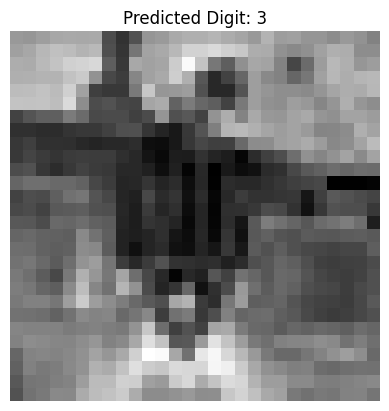

In [23]:
import matplotlib.pyplot as plt

plt.imshow(image_array, cmap=plt.cm.binary)
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()


#seconde

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt


In [25]:
# Load your image
image = Image.open('G:\IMG_20221104_094215.JPG')  # Replace 'your_image.jpg' with your image file path

# Resize to 28x28 pixels
image = image.resize((28, 28))

# Convert to grayscale
image = image.convert('L')

# Apply a sharpening filter to reduce blur
image = image.filter(ImageFilter.SHARPEN)

# Convert to NumPy array and normalize pixel values to be between 0 and 1
image_array = np.array(image) / 255.0

# Reshape the image to match the model's input shape
input_image = np.expand_dims(image_array, axis=0)


In [26]:
# Load your pre-trained model
model = keras.models.load_model('your_model_path')  # Replace 'your_model_path' with the path to your model file


OSError: No file or directory found at your_model_path